__<font size = 4><a href = https://www.kaggle.com/gilsousa/habermans-survival-data-set>Habermans Cancer Survival dataset</a> from Kaggle.</font>__

In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the data
df = pd.read_csv('haberman.csv')
df.head() #to show our data

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
    -- 1 = the patient survived 5 years or longer
    -- 2 = the patient died within 5 year
* So our data set has four columns out of which three (age,year,nodes) are input variable and one (status) is output variable. Features are also known as independent variables or input variables or predictors or sometime we just call them variables. Outpit varible is known as response variable or dependent variable.
* So let's print the number of points, numer of features, number of classes, data-points per class
* For <a href =  https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival>more deatils</a> about dataset.

In [2]:
#shape of data is
print('Shape of given data is\n',df.shape)

Shape of given data is
 (306, 4)


* From above output we can say our data has 306 rows (or data points) and 4 columns

In [3]:
# to print the columns
print('Column names of data are:\n',df.columns)

Column names of data are:
 Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
# to know classes in our data and points per class
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

* so our data has only two class (1 and 2) by status (which is response variable). Class 1 has 225 points and class 2 has 81 points. So given data set looks imbalanced.

# Objective
* Can we differentiate each class if yes then how?
* Which feature/features can explain status?
* performing EDA on this data.


## Univariate
* PDF, CDF, Histogram, Box Plot, Voilin plot

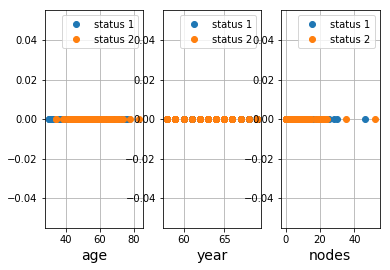

In [5]:
k = ['age', 'year', 'nodes']
plt.figure(1)
for i,j in enumerate(k,1): #enumerate index will start from 1
    a = str(13)+str(i)
    plt.subplot(int(a))
    plt.plot(df[j][df['status'] == 1],np.zeros(len(df[j][df['status'] == 1])), 'o', label = 'status 1')
    plt.plot(df[j][df['status'] == 2],np.zeros(len(df[j][df['status'] == 2])),'o',label = 'status 2')
    plt.xlabel(j, fontsize = 14)
    plt.grid('on')
    plt.legend()
plt.show()

**Observation**
* Not much clear from above graph, and we can not create a model which can seperate both classes (1 and 2) by above graph.

**<font size =5>PDF and Histogram</font>**

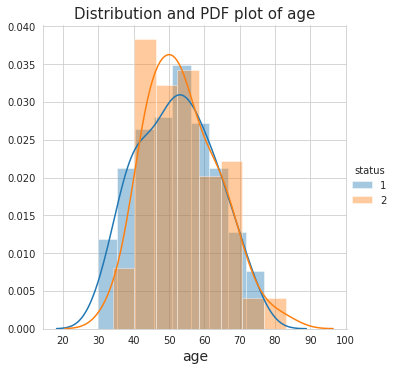

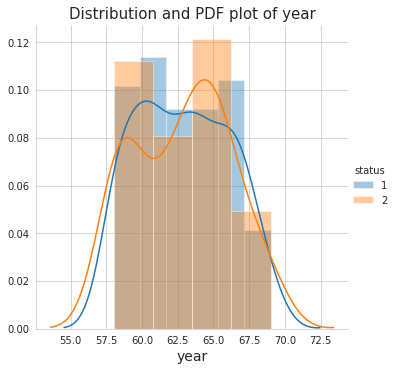

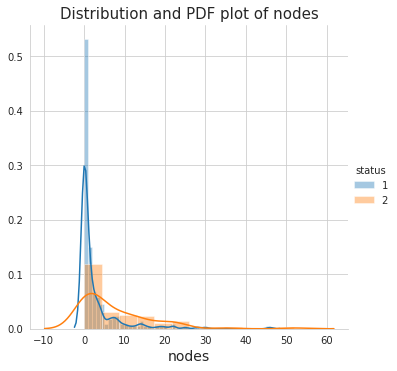

In [6]:
for j in k:
    sns.set_style('whitegrid')
    sns.FacetGrid(df, hue = 'status', size = 5).map(sns.distplot, j).add_legend()
    plt.title('Distribution and PDF plot of '+str(j), fontsize = 15)
    plt.xlabel(j, fontsize = 14)
    plt.show()

**<font size = 4>Observation</font>**
* From above three graphs we can not seperate two classes because PDFs or histogram bars of both classes are almost overlapping in all above three graphs.
* we can try to make a model by using 'nodes' feature by setting second intersection point from left side of both PDFs as our threshold, but this model will have huge error. using if ......... else statement.
if nodes < 4 then status 1 else status 2 (don't create this model, it has huge error)

**<font size = 5>PDF and CDF of age, year, nodes</font>**

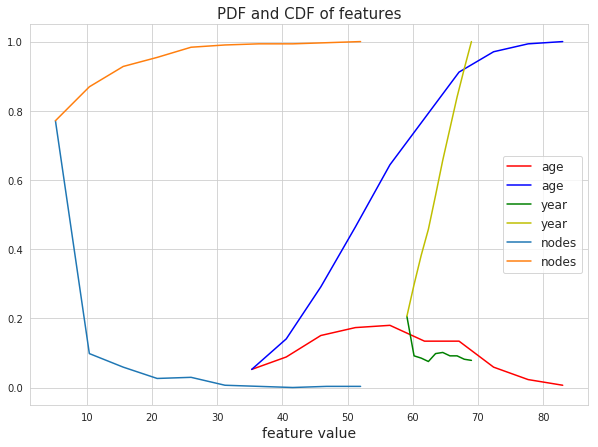

In [7]:
# References: from files provide by you
count_age, bin_edge_age = np.histogram(df['age'], bins=10, density = True)
pdf_age = count_age/sum(count_age)
cdf_age = np.cumsum(pdf_age)

count_year, bin_edge_year = np.histogram(df['year'], bins=10, density = True)
pdf_year = count_year/sum(count_year)
cdf_year = np.cumsum(pdf_year)

count_nodes, bin_edge_nodes = np.histogram(df['nodes'], bins=10, density = True)
pdf_nodes = count_nodes/sum(count_nodes)
cdf_nodes = np.cumsum(pdf_nodes)

plt.figure(figsize = (10,7))
plt.plot(bin_edge_age[1:], pdf_age, 'r', bin_edge_age[1:],cdf_age, 'b', label = 'age')
plt.plot(bin_edge_year[1:],pdf_year, 'g', bin_edge_year[1:],cdf_year,'y', label = 'year')
plt.plot(bin_edge_nodes[1:],pdf_nodes, bin_edge_nodes[1:],cdf_nodes, label = 'nodes')
plt.legend(fontsize = 12)
plt.title('PDF and CDF of features', fontsize = 15)
plt.xlabel('feature value', fontsize = 14)
plt.grid('on')
plt.show()

**<font size = 4>Observation</font>**
* We can find out the percentage of people who have their operation till 65 (which 1965) and answer is around 50 %.
* Similar things can be obtained for other two features.


**<font size = 5>Mean, Median, std-dev, MAD(median absolute deviation), IQR, Qunatile, Percentiel</font>**

In [8]:
df[['age', 'year', 'nodes']].describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [9]:
print('Mean:\n Age:',np.mean(df['age']), '\nYear:',np.mean(df['year']), '\nnodes:',np.mean(df['nodes']))

print('\nMedian:\n Age:',np.median(df['age']), '\nYear:',np.median(df['year']), '\nnodes:',np.median(df['nodes']))

print('\nStd-dev:\n Age:',np.std(df['age']), '\nYear:',np.std(df['year']), '\nnodes:',np.std(df['nodes']))

print('\nQuntiles:\n Age:',np.percentile(df['age'],np.arange(25,100,25)), 
      '\nYear:',np.percentile(df['year'],np.arange(25,100,25)),
      '\nnodes:',np.percentile(df['nodes'],np.arange(25,100,25)))

print('\n90th Pecentile:\n Age:',np.percentile(df['age'],90),
      '\nYear:',np.percentile(df['year'],90),'\nnodes:',np.percentile(df['nodes'],90))

from statsmodels import robust as rb
print('\nMAD\nAge',rb.mad(df['age']),'\nyear:',rb.mad(df['year']),'\nnodes:',rb.mad(df['nodes']))

Mean:
 Age: 52.45751633986928 
Year: 62.85294117647059 
nodes: 4.026143790849673

Median:
 Age: 52.0 
Year: 63.0 
nodes: 1.0

Std-dev:
 Age: 10.785785203631832 
Year: 3.244090833563246 
nodes: 7.177896092811143

Quntiles:
 Age: [44.   52.   60.75] 
Year: [60.   63.   65.75] 
nodes: [0. 1. 4.]

90th Pecentile:
 Age: 67.0 
Year: 67.0 
nodes: 13.0

MAD
Age 11.860817748044816 
year: 4.447806655516806 
nodes: 1.482602218505602


**<font size = 4>Observation</font>**
* in similar way we can find out the mean, median, std-dev, MAD, Quantiles for each feature with respect to each class like what will be the mean,median, std-dev, MAD and quantiels of age,year and nodes of class 1 and class 2.
* here are these parameters

In [10]:
print('By class 1')
print('Mean:\n Age:',np.mean(df['age'][df['status'] == 1]),
      '\nYear:',np.mean(df['year'][df['status'] == 1]),
      '\nnodes:',np.mean(df['nodes'][df['status'] == 1]))
print('\nMedian:\n Age:',np.median(df['age'][df['status'] == 1]),
      '\nYear:',np.median(df['year'][df['status'] == 1]),
      '\nnodes:',np.median(df['nodes'][df['status'] == 1]))
print('\nStd-dev:\n Age:',np.std(df['age'][df['status'] == 1]),
      '\nYear:',np.std(df['year'][df['status'] == 1]),
      '\nnodes:',np.std(df['nodes'][df['status'] == 1]))
print('\nQuntiles:\n Age:',np.percentile(df['age'][df['status'] == 1],np.arange(25,100,25)), 
      '\nYear:',np.percentile(df['year'][df['status'] == 1],np.arange(25,100,25)),
      '\nnodes:',np.percentile(df['nodes'][df['status'] == 1],np.arange(25,100,25)))
print('\n90th Pecentile:\n Age:',np.percentile(df['age'][df['status'] == 1],90),
      '\nYear:',np.percentile(df['year'][df['status'] == 1],90),
      '\nnodes:',np.percentile(df['nodes'][df['status'] == 1],90))
print('\nMAD\nAge',rb.mad(df['age'][df['status'] == 1]),
      '\nyear:',rb.mad(df['year'][df['status'] == 1]),
      '\nnodes:',rb.mad(df['nodes'][df['status'] == 1]))

print('\n\n\nBy Class 2')
print('Mean:\n Age:',np.mean(df['age'][df['status'] == 2]),
      '\nYear:',np.mean(df['year'][df['status'] == 2]),
      '\nnodes:',np.mean(df['nodes'][df['status'] == 2]))
print('\nMedian:\n Age:',np.median(df['age'][df['status'] == 2]),
      '\nYear:',np.median(df['year'][df['status'] == 2]),
      '\nnodes:',np.median(df['nodes'][df['status'] == 2]))
print('\nStd-dev:\n Age:',np.std(df['age'][df['status'] == 2]),
      '\nYear:',np.std(df['year'][df['status'] == 2]),
      '\nnodes:',np.std(df['nodes'][df['status'] == 2]))
print('\nQuntiles:\n Age:',np.percentile(df['age'][df['status'] == 2],np.arange(25,100,25)), 
      '\nYear:',np.percentile(df['year'][df['status'] == 2],np.arange(25,100,25)),
      '\nnodes:',np.percentile(df['nodes'][df['status'] == 2],np.arange(25,100,25)))
print('\n90th Pecentile:\n Age:',np.percentile(df['age'][df['status'] == 2],90),
      '\nYear:',np.percentile(df['year'][df['status'] == 2],90),
      '\nnodes:',np.percentile(df['nodes'][df['status'] == 2],90))
print('\nMAD\nAge',rb.mad(df['age'][df['status'] == 2]),
      '\nyear:',rb.mad(df['year'][df['status'] == 2]),
      '\nnodes:',rb.mad(df['nodes'][df['status'] == 2]))

By class 1
Mean:
 Age: 52.01777777777778 
Year: 62.86222222222222 
nodes: 2.7911111111111113

Median:
 Age: 52.0 
Year: 63.0 
nodes: 0.0

Std-dev:
 Age: 10.987655475100508 
Year: 3.2157452144021947 
nodes: 5.857258449412138

Quntiles:
 Age: [43. 52. 60.] 
Year: [60. 63. 66.] 
nodes: [0. 0. 3.]

90th Pecentile:
 Age: 67.0 
Year: 67.0 
nodes: 8.0

MAD
Age 13.343419966550417 
year: 4.447806655516806 
nodes: 0.0



By Class 2
Mean:
 Age: 53.67901234567901 
Year: 62.82716049382716 
nodes: 7.45679012345679

Median:
 Age: 53.0 
Year: 63.0 
nodes: 4.0

Std-dev:
 Age: 10.104182193031312 
Year: 3.3214236255207887 
nodes: 9.128776076761635

Quntiles:
 Age: [46. 53. 61.] 
Year: [59. 63. 65.] 
nodes: [ 1.  4. 11.]

90th Pecentile:
 Age: 67.0 
Year: 67.0 
nodes: 20.0

MAD
Age 11.860817748044816 
year: 4.447806655516806 
nodes: 5.930408874022408


**<font size = 4>Obseravtion</font>**
* If we consider there are no outliers in our data we can say one thing that who had their operation in early stage (near 40 to 55 age) they had survived after 5 year of operarion. Because average age of class 1 is around 52.01 and average of class 2 is around 53.6.

**<font size = 5>Box Plots and Whiskers</font>**

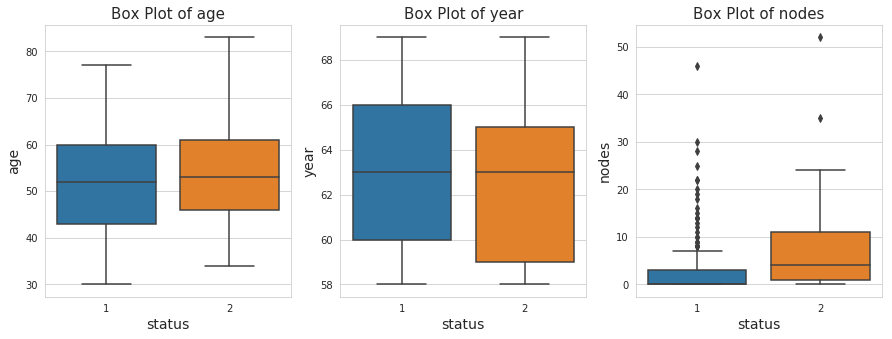

In [11]:
plt.figure(1, figsize = (15,5))
for i,j in enumerate(k,1):
    a = str(13)+str(i)
    plt.subplot(int(a))
    sns.set_style('whitegrid')
    sns.boxplot(x = 'status', y = j, data = df)
    plt.title('Box Plot of '+str(j), fontsize = 15)
    plt.xlabel('status', fontsize = 14)
    plt.ylabel(j, fontsize = 14)
plt.show()

**<font size = 4>Observation</font>**
* We can find qunatiles and IQR from abive three box plots. Middle line of box plot is 50th pecentile, line below 50th percentile is 25th percentile and line above 50th percntile is 75th pecentile.


**<font size = 5>Voilin Plot</font>**

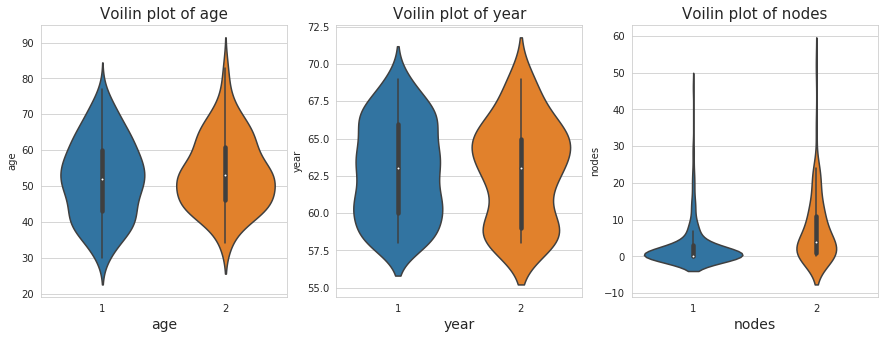

In [12]:
plt.figure(1, figsize = (15,5))
for i,j in enumerate(k,1):
    a = str(13)+str(i)
    plt.subplot(int(a))
    sns.violinplot(x = 'status', y = j, data = df)
    plt.title('Voilin plot of '+str(j), fontsize = 15)
    plt.xlabel(j, fontsize = 14)
plt.show()

## Bivariant

**<font size = 4>Scatter plot</font>**

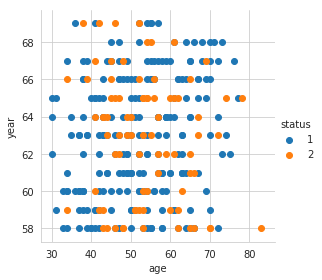

In [13]:
#using seaborn
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'status', size = 4).map(plt.scatter,'age','year').add_legend()
# sns.FacetGrid(df, hue = 'status', size = 5).map(plt.scatter,'age','nodes').add_legend()
# sns.FacetGrid(df, hue = 'status', size = 5).map(plt.scatter,'nodes','year').add_legend()
plt.show()

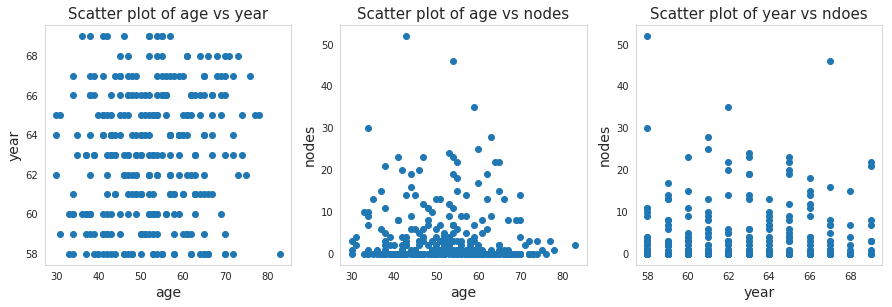

In [14]:
#scatter plot using matplotlib.pyplot.scatter
plt.figure(1, figsize = (15,15))
plt.subplot(331)
plt.scatter(df['age'],df['year'])
plt.title('Scatter plot of age vs year', fontsize = 15)
plt.xlabel('age', fontsize = 14)
plt.ylabel('year', fontsize = 14)
plt.grid()

plt.subplot(332)
plt.scatter(df['age'],df['nodes'])
plt.title('Scatter plot of age vs nodes', fontsize = 15)
plt.xlabel('age', fontsize = 14)
plt.ylabel('nodes', fontsize = 14)
plt.grid()

plt.subplot(333)
plt.scatter(df['year'],df['nodes'])
plt.title('Scatter plot of year vs ndoes', fontsize = 15)
plt.xlabel('year', fontsize = 14)
plt.ylabel('nodes', fontsize = 14)
plt.grid()
plt.show()

**<font size = 4>Observation</font>**
* From above scatter plot I can't decie how to create a model which can seperate two classes
* Let's see in pair plot

**<font size = 5>Pair-Plot</font>**

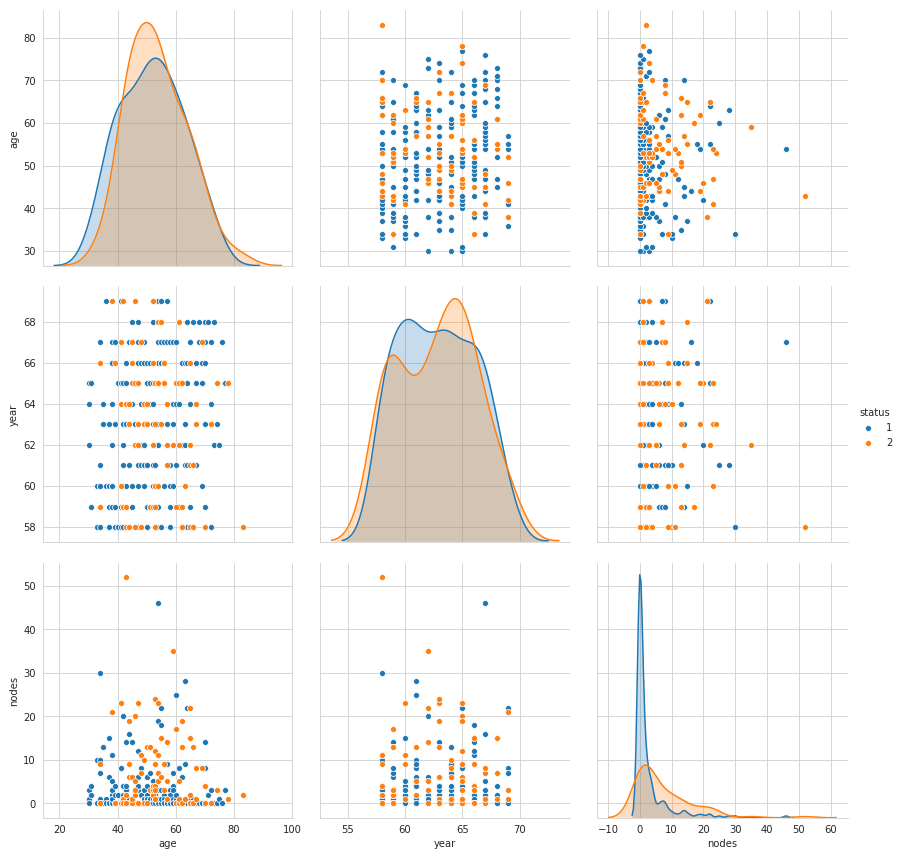

In [15]:
sns.pairplot(df, hue = 'status',vars=['age','year','nodes'], size = 4)
plt.show()

**<font size = 4>Observation</font>**
* No pair of feature is good which can seperate our status 1 and status 2
* All points are so mixed up that no line or no regular (line, circle, parabola etc.) curve can seperate these two status.
* PDFs curve of both status are overlapping each other in all three cases and there is no gap between PDFs curve of both status.
